In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Source

For this task we needed labeled songs by genre.
This information wasn't available in the top daily songs, so we collected the data from playlists of certain genre.
For example - 
We looked for Rock playlist -> Collected the songs from there -> Added the available features 

We decided to focus on 5 different genres that we think would have different characteristics. We chose Classical music, Hiphop and Rap, Jazz, Reggae and Rock. 

### Import the data and merge each table to one DataFrame

In [2]:
df_classical = pd.read_csv("./data/classical.csv")
df_hiphop = pd.read_csv("./data/hiphop.csv")
df_jazz = pd.read_csv("./data/jazz.csv")
df_reggae = pd.read_csv("./data/reggae.csv")
df_rock = pd.read_csv("./data/rock.csv")
df = pd.concat([df_classical,df_hiphop,df_jazz,df_reggae,df_rock]) 

In [3]:
df

,name,artist,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,"Beethoven: Trio for Oboe, Clarinet and Bassoon...",Ludwig van Beethoven,5KhznZQE9EbrmXx2Q9WUZM,0.209,0.0407,5,-20.998,1,0.0450,0.995000,0.894000,0.1090,0.0788,66.236,256587,3,classical
1,Distance De Fée,Toru Takemitsu,3LO6mkszz2JSTk9AHr47e2,0.219,0.0317,8,-23.834,1,0.0435,0.975000,0.002810,0.0997,0.0271,88.605,378800,4,classical
2,"Part Of Your World - From ""The Little Mermaid""",Royal Philharmonic Orchestra,464ugbhLm0zZ2zCaRMwg6n,0.282,0.1550,2,-17.271,1,0.0331,0.919000,0.939000,0.1100,0.1000,91.703,252813,4,classical
3,Computer Love,Balanescu Quartet,4UmXzLXO9298F8UdR4Ndmn,0.542,0.2180,5,-16.545,1,0.0411,0.912000,0.926000,0.1740,0.5600,123.812,380160,4,classical
4,Handel : Concerto grosso in F major Op.3 No.4a...,George Frideric Handel,6xhVveC94ilVUSkw0WNp0W,0.607,0.0342,4,-19.540,1,0.0402,0.969000,0.003710,0.1080,0.4530,121.288,198013,3,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,Runaway Train,Soul Asylum,3TW48DvQ7ChwY1Yy1tkMaP,0.613,0.7200,0,-7.957,1,0.0425,0.013200,0.000000,0.1040,0.5610,117.341,265867,4,rock
3365,Bullets in the Dark (feat. MOD SUN),No Love For The Middle Child,2FwhZ9LriLQ3oiRF4h1vJ1,0.673,0.9230,1,-3.628,0,0.0521,0.010700,0.000000,0.1200,0.9460,139.969,181547,4,rock
3366,Get Free,The Vines,1JcGNoiwifg0MdJMVgJQYx,0.502,0.9780,7,-3.278,1,0.0649,0.000163,0.000001,0.2870,0.6030,138.811,126573,4,rock
3367,A Decade Under The Influence - Acoustic,Taking Back Sunday,6c6vG7r3RWpiuIrawHNpd7,0.497,0.3260,8,-8.801,1,0.0293,0.444000,0.000000,0.0746,0.1630,72.449,252467,4,rock


### Shuffle the data

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

### Remove duplicates

Some songs might appear in two tables, so we wanted to filter duplicates out.

In [5]:
df = df.drop_duplicates(subset=['spotify_id'])

### Normalization of data

As we can see, most features are between 0 and 1 except tempo, loudness, key, duration and time signature.

In [6]:

for col in ['loudness', 'tempo','duration_ms','time_signature','key']:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col] = ((df[col] - col_min) / (col_max - col_min))

### Finding outliers

We wanted to find outliers in our data using box plot graph.

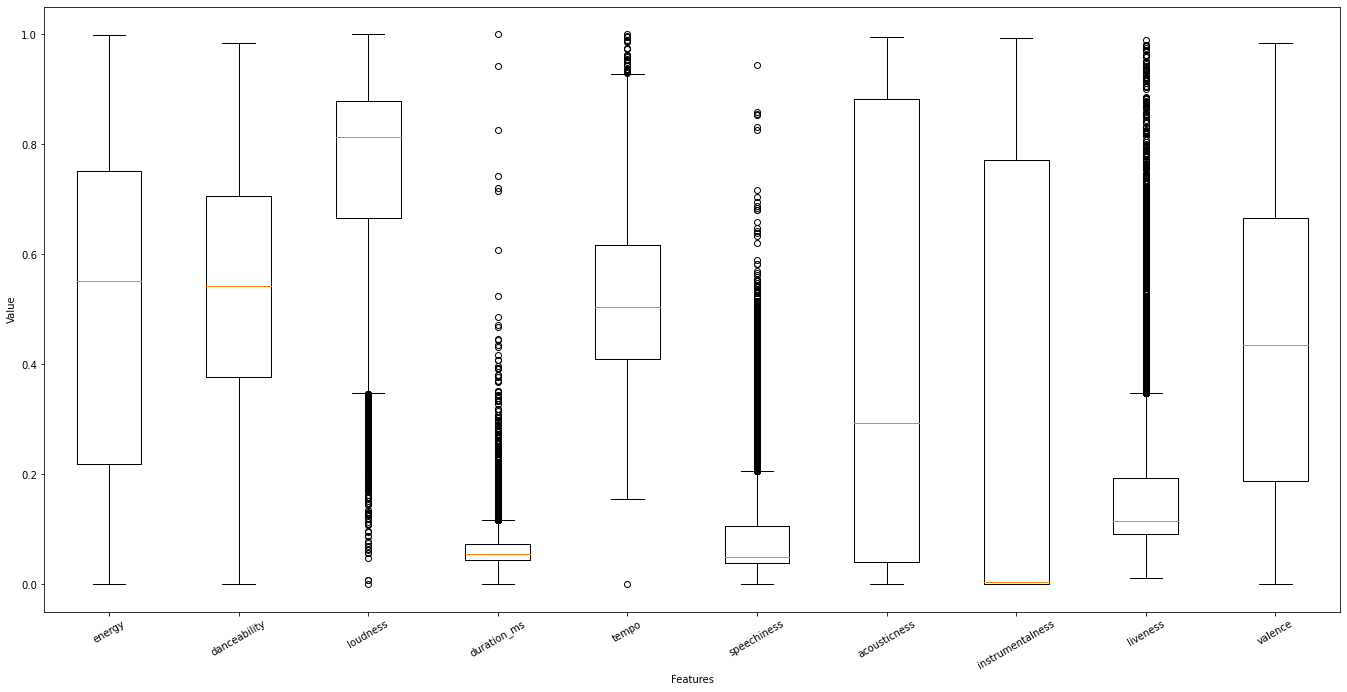

In [7]:
display_data=[df['energy'],df['danceability'],df['loudness'],df['duration_ms'],df['tempo'], \
              df['speechiness'],df['acousticness'],df['instrumentalness'],df['liveness'], \
              df['valence']]
relevantCol = ['energy','danceability','loudness','duration_ms','tempo','speechiness',\
               'acousticness','instrumentalness','liveness','valence']
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left=0.3, right=1.5,
                    top=0.94, bottom=0.1)
plt.boxplot(display_data)
plt.xticks(range(1,11),relevantCol,rotation=30)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [8]:
features_corr = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']

### Outliers definition

In our data we marked songs as outliers if these songs have more than one features that is marked as an outlier.

In [9]:
df.reset_index(drop=True)
all_outliers = np.array([],dtype='int64')
for feature in relevantCol:
    Q1 = np.percentile(df[feature],25)
    Q3 = np.percentile(df[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts = df[ ~((df[feature]>=Q1-step) & (df[feature]<=Q3+step))]
    all_outliers = np.append(all_outliers,outlier_pts.index.values.astype('int64'))

all_outliers2,indices = np.unique(all_outliers,return_inverse=True)

#### Number of songs with one feature marked as an outlier

In [10]:
len(all_outliers)

4592

In [11]:
counts = np.bincount(indices)

In [12]:
outliers = all_outliers2[counts>1]

#### Number of songs with more than one feature marked as an outlier

In [13]:
len(outliers)

428

#### We found out that we have 428 outliers in our data, we will filter them out

In [14]:
indexes_to_keep = set(range(df.shape[0])) - set(outliers)
filtered_data = df.take(list(indexes_to_keep))
filtered_data.reset_index(drop=True)

,name,artist,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Jet Lag,A$AP Ferg,0AUurCHJ6A8Ua4yXyKXNuM,0.850,0.803,1.000000,0.937011,1,0.2920,0.008500,0.000024,0.104,0.4330,0.772600,0.049269,0.8,hiphop
1,Can't Get You Out of My Head,Johnny Goth,6mtTiVREzK3kV0E65MXCZo,0.396,0.682,0.727273,0.777022,1,0.0356,0.005880,0.127000,0.120,0.2620,0.685998,0.045622,0.8,rock
2,Rain,Tones On Tail,5Srq4DJy3AMtHeX4q5uTZX,0.246,0.333,0.818182,0.741545,1,0.0326,0.851000,0.762000,0.155,0.0710,0.674222,0.134251,0.8,rock
3,MVP,Big L,5LN1B9uVAVleCZ2euGarvi,0.857,0.672,0.909091,0.880991,0,0.1600,0.064900,0.000000,0.355,0.6710,0.394409,0.053521,0.8,hiphop
4,"Suite From Mulan - From ""Mulan""/Score",Jerry Goldsmith,1b6Spq4MiEzShOBQLtEhWe,0.143,0.102,0.000000,0.589692,1,0.0358,0.794000,0.893000,0.270,0.0761,0.422765,0.111746,0.8,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13152,Any Way You Want It,Journey,2DyHhPyCZgZzNXn1IrtsTu,0.519,0.934,0.636364,0.855434,1,0.0471,0.000312,0.004570,0.137,0.5860,0.627958,0.048749,0.8,rock
13153,The Worst In Me,KAYTRANADA,4cOVTA2GfYTHw99AJDQpHo,0.784,0.645,0.909091,0.851440,0,0.4020,0.009360,0.000132,0.117,0.5900,0.499859,0.055725,0.8,hiphop
13154,Bal Tout,Steves J. Bryan,6ZBZ0q3WXLK9VAszMLenAU,0.915,0.647,0.000000,0.888384,1,0.1290,0.126000,0.000000,0.101,0.8050,0.468221,0.045717,0.8,reggae
13155,Doodlin',Horace Silver,2KJ2lr5rI6eNsEj7jGTY5g,0.670,0.236,0.545455,0.668444,1,0.0825,0.949000,0.918000,0.118,0.5900,0.555309,0.106033,0.8,jazz


### Save the data to an Excel sheet

In [15]:
filtered_data.to_csv("./data/DF_Daily_Classification.csv", index=False)